In [2]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

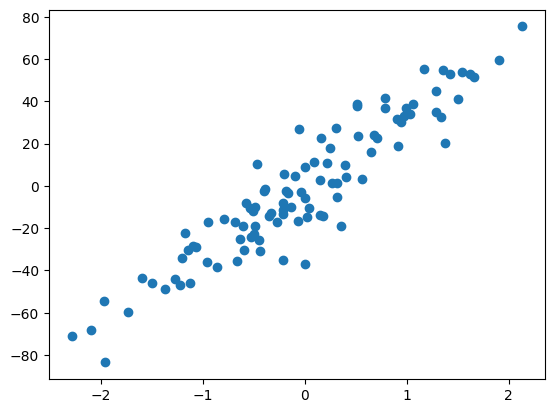

In [25]:
x, y = make_regression(n_samples= 100, n_features=1, noise= 10)
plt.scatter(x, y)

In [4]:
print(x.shape)
y = y.reshape(y.shape[0], 1)
print(y.shape[0])

(100, 1)
100


In [5]:
# Matrice X
X = np.hstack((x, np.ones(x.shape)))
X.shape

(100, 2)

In [6]:
theta = np.random.randn(2, 1)
theta

array([[0.43123511],
       [1.94569929]])

In [7]:
# Model
def model(X, theta):
    return X @ theta

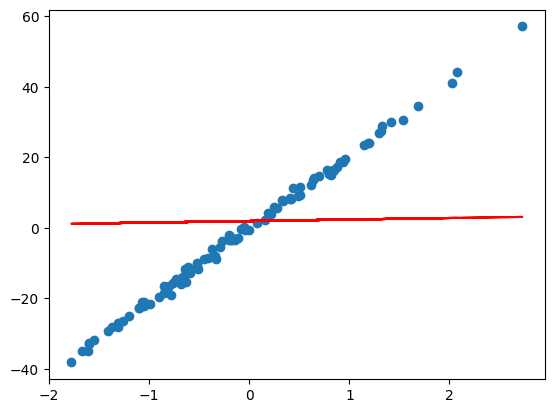

In [8]:
plt.scatter(x,y)
plt.plot(x, model(X, theta), c='r')

In [9]:
# Fonction Cout
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)
cost_function(X, y, theta)

np.float64(189.35086811857732)

In [10]:
# Gradients
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T @ (model(X, theta) - y)

In [11]:
# Descente de Gradient
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [12]:
# Machine Learning !

In [13]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

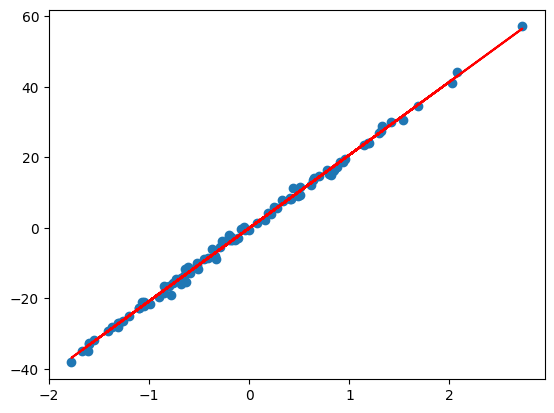

In [14]:
predictions = model(X, theta_final)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

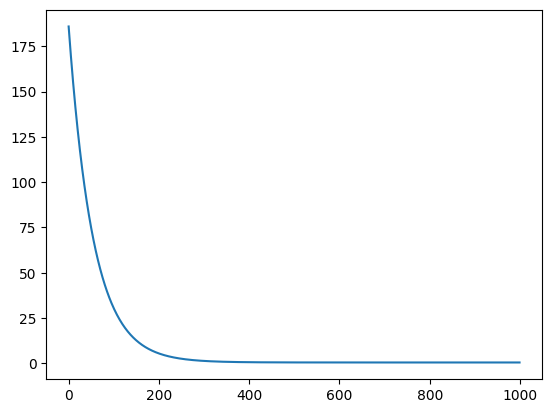

In [15]:
plt.plot(range(1000), cost_history)

In [16]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [17]:
coef_determination(y, predictions)

np.float64(0.9974720643744337)